<a href="https://colab.research.google.com/github/anonymous174174/404brain-not-found/blob/main/examples/ResNet-18%20CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuronix Library Setup

In [1]:
!git clone https://github.com/anonymous174174/404brain-not-found.git

Cloning into '404brain-not-found'...
remote: Enumerating objects: 517, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 517 (delta 138), reused 160 (delta 77), pack-reused 282 (from 1)
Receiving objects: 100% (517/517), 975.08 KiB | 2.01 MiB/s, done.
Resolving deltas: 100% (319/319), done.


In [ ]:
%cd /content/404brain-not-found

/content/404brain-not-found


In [ ]:
!pip install -e .


Obtaining file:///content/404brain-not-found
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%cd ..

/content


In [ ]:
import sys
sys.path.append('/content/404brain-not-found/src')
import importlib
import neuronix
import neuronix.autograd_graph
import neuronix.custom_tensor
import neuronix.module
import neuronix.losses
import neuronix.optimizers
import neuronix.config

importlib.reload(neuronix)
importlib.reload(neuronix.autograd_graph)
importlib.reload(neuronix.custom_tensor)
importlib.reload(neuronix.module)
importlib.reload(neuronix.losses)
importlib.reload(neuronix.optimizers)
importlib.reload(neuronix.config)

<module 'neuronix.config' from '/content/404brain-not-found/src/neuronix/config.py'>

# ResNet-18

In [ ]:
# @title ResNet 18 model architecture for cifar10
import neuronix.module as m
import neuronix.losses as l
class Resnet18(m.Module):
  def __init__ (self,graph):
    super().__init__()
    # Input Related
    self.conv_in  = m.Conv2d(
        in_channels=3,
        out_channels=64,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.bn_in = m.BatchNorm_Nd(
        num_features=64,
        graph=graph
    )
    self.relu_in = m.ReLu(graph = graph)

    # stage 1
    self.layer1_conv1 = m.Conv2d(
        in_channels=64,
        out_channels=64,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer1_bn1 = m.BatchNorm_Nd(
        num_features=64,
        graph=graph
    )
    self.layer1_relu1 = m.ReLu(graph=graph)
    self.layer1_conv2 = m.Conv2d(
        in_channels=64,
        out_channels=64,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer1_bn2 = m.BatchNorm_Nd(
        num_features=64,
        graph=graph
    )
    # add skip in forward
    self.layer1_relu2 = m.ReLu(graph=graph)
    self.layer1_conv3 = m.Conv2d(
        in_channels=64,
        out_channels=64,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer1_bn3 = m.BatchNorm_Nd(
        num_features=64,
        graph=graph
    )
    self.layer1_relu3 = m.ReLu(graph=graph)
    self.layer1_conv4 = m.Conv2d(
        in_channels=64,
        out_channels=64,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer1_bn4 = m.BatchNorm_Nd(
        num_features=64,
        graph=graph
    )
    # add skip in forward
    self.layer1_relu4 = m.ReLu(graph=graph)
    # Layer 2
    self.layer2_conv1 = m.Conv2d(
        in_channels=64,
        out_channels=128,
        kernel_size=3,
        stride=2,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer2_bn1 = m.BatchNorm_Nd(
        num_features=128,
        graph=graph
    )
    self.layer2_relu1 = m.ReLu(graph=graph)
    self.layer2_conv2 = m.Conv2d(
        in_channels=128,
        out_channels=128,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer2_bn2 = m.BatchNorm_Nd(
        num_features=128,
        graph=graph
    )
    self.layer2_reshape_for_skip = m.Conv2d(
        in_channels=64,
        out_channels=128,
        kernel_size=1,
        stride=2,
        padding=0,
        graph=graph,
        bias=False,
        activation="relu"
    )
    # Add skip in forward
    self.layer2_relu2 = m.ReLu(graph=graph)
    self.layer2_conv3 = m.Conv2d(
        in_channels=128,
        out_channels=128,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer2_bn3 = m.BatchNorm_Nd(
        num_features=128,
        graph=graph
    )
    self.layer2_relu3 = m.ReLu(graph=graph)
    self.layer2_conv4 = m.Conv2d(
        in_channels=128,
        out_channels=128,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu")
    self.layer2_bn4 = m.BatchNorm_Nd(
        num_features=128,
        graph=graph
    )
    # add skip in forward
    self.layer2_relu4 = m.ReLu(graph=graph)
    # Layer 3
    self.layer3_conv1 = m.Conv2d(
        in_channels=128,
        out_channels=256,
        kernel_size=3,
        stride=2,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer3_bn1 = m.BatchNorm_Nd(
        num_features=256,
        graph=graph
    )
    self.layer3_relu1 = m.ReLu(graph=graph)
    self.layer3_conv2 = m.Conv2d(
        in_channels=256,
        out_channels=256,
        kernel_size=3,
        stride=1,
        padding=1,
        graph = graph,
        bias=False,
        activation = "relu"
    )
    self.layer3_bn2 = m.BatchNorm_Nd(
        num_features=256,
        graph=graph
    )
    self.layer3_reshape_for_skip = m.Conv2d(
        in_channels=128,
        out_channels=256,
        kernel_size=1,
        stride=2,
        padding=0,
        graph=graph,
        bias=False,
        activation="relu"
    )
    # add skip in forward
    self.layer3_relu2 = m.ReLu(graph=graph)
    self.layer3_conv3 = m.Conv2d(
        in_channels=256,
        out_channels=256,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer3_bn3 = m.BatchNorm_Nd(
        num_features=256,
        graph=graph
    )
    self.layer3_relu3 = m.ReLu(graph=graph)
    self.layer3_conv4 = m.Conv2d(
        in_channels=256,
        out_channels=256,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer3_bn4 = m.BatchNorm_Nd(
        num_features=256,
        graph=graph
    )
    # add skip in forward
    self.layer3_relu4 = m.ReLu(graph=graph)
    # Layer 4
    self.layer4_conv1 = m.Conv2d(
        in_channels=256,
        out_channels=512,
        kernel_size=3,
        stride=2,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer4_bn1 = m.BatchNorm_Nd(
        num_features=512,
        graph=graph
    )
    self.layer4_relu1 = m.ReLu(graph=graph)
    self.layer4_conv2 = m.Conv2d(
        in_channels=512,
        out_channels=512,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer4_bn2 = m.BatchNorm_Nd(
        num_features=512,
        graph=graph)
    self.layer4_reshape_for_skip = m.Conv2d(
        in_channels=256,
        out_channels=512,
        kernel_size=1,
        stride=2,
        padding=0,
        graph=graph,
        bias=False,
        activation="relu"
    )
    # add skip in forward
    self.layer4_relu2 = m.ReLu(graph=graph)
    self.layer4_conv3 = m.Conv2d(
        in_channels=512,
        out_channels=512,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer4_bn3 = m.BatchNorm_Nd(
        num_features=512,
        graph=graph
    )
    self.layer4_relu3 = m.ReLu(graph=graph)
    self.layer4_conv4 = m.Conv2d(
        in_channels=512,
        out_channels=512,
        kernel_size=3,
        stride=1,
        padding=1,
        graph=graph,
        bias=False,
        activation="relu"
    )
    self.layer4_bn4 = m.BatchNorm_Nd(
        num_features=512,
        graph=graph
    )
    # Add skip in forward
    self.layer4_relu4 = m.ReLu(graph=graph)
    # Avg Pooling
    self.avgpool = m.AvgPool2d(
        kernel_size=4,
        stride=1,
        padding=0,
        graph=graph
    )
    # reshape the tensor (ie flatten it before passing it in forward)
    self.linear = m.Linear(
        in_features = 512,
        out_features = 10,
        graph = graph
    )

  def forward(self,x):
    x = self.conv_in(x)
    x = self.bn_in(x)
    x_skip = self.relu_in(x)
    # Layer 1
    x = self.layer1_conv1(x_skip)
    x = self.layer1_bn1(x)
    x = self.layer1_relu1(x)
    x = self.layer1_conv2(x)
    x = self.layer1_bn2(x)
    x_skip = x + x_skip
    x_skip = self.layer1_relu2(x_skip)
    x = self.layer1_conv3(x_skip)
    x = self.layer1_bn3(x)
    x = self.layer1_relu3(x)
    x = self.layer1_conv4(x)
    x = self.layer1_bn4(x)
    x_skip = x + x_skip
    x_skip = self.layer1_relu4(x_skip)
    # Layer 2
    x = self.layer2_conv1(x_skip)
    x = self.layer2_bn1(x)
    x = self.layer2_relu1(x)
    x = self.layer2_conv2(x)
    x = self.layer2_bn2(x)
    x_skip = self.layer2_reshape_for_skip(x_skip)
    x_skip = x + x_skip
    x_skip = self.layer2_relu2(x_skip)
    x = self.layer2_conv3(x_skip)
    x = self.layer2_bn3(x)
    x = self.layer2_relu3(x)
    x = self.layer2_conv4(x)
    x = self.layer2_bn4(x)
    x_skip = x + x_skip
    x_skip = self.layer2_relu4(x_skip)
    # Layer 3
    x = self.layer3_conv1(x_skip)
    x = self.layer3_bn1(x)
    x = self.layer3_relu1(x)
    x = self.layer3_conv2(x)
    x = self.layer3_bn2(x)
    x_skip = self.layer3_reshape_for_skip(x_skip)
    x_skip = x + x_skip
    x_skip = self.layer3_relu2(x_skip)
    x = self.layer3_conv3(x_skip)
    x = self.layer3_bn3(x)
    x = self.layer3_relu3(x)
    x = self.layer3_conv4(x)
    x = self.layer3_bn4(x)
    x_skip = x + x_skip
    x_skip = self.layer3_relu4(x_skip)
    # Layer 4
    x = self.layer4_conv1(x_skip)
    x = self.layer4_bn1(x)
    x = self.layer4_relu1(x)
    x = self.layer4_conv2(x)
    x = self.layer4_bn2(x)
    x_skip = self.layer4_reshape_for_skip(x_skip)
    x_skip = x + x_skip
    x_skip = self.layer4_relu2(x_skip)
    x = self.layer4_conv3(x_skip)
    x = self.layer4_bn3(x)
    x = self.layer4_relu3(x)
    x = self.layer4_conv4(x)
    x = self.layer4_bn4(x)
    x_skip = x + x_skip
    x = self.layer4_relu4(x_skip)
    # Avg Pooling
    x = self.avgpool(x)
    # reshape the tensor (ie flatten it before passing it in forward)
    x = x.reshape((x.shape[0],-1))
    x = self.linear(x)
    return x




# Training loop

In [ ]:
# @title Training Loop
import os
import sys
import csv
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from neuronix.optimizers import AdamW
from neuronix.autograd_graph import AutogradGraph
from neuronix.custom_tensor import CustomTensor
from neuronix.lr_scheduler import CosineAnnealingLR
import neuronix.losses as l
import glob
from neuronix.config import device,dtype
# Configuration
SAVE_PATH = os.path.join(os.getcwd(),"experiments")  # Base directory for saving experiments
EXP_NAME = "resnet18_cifar10"  # Experiment name
CHECKPOINT_INTERVAL = 10  # Save checkpoint every N epochs
N_EPOCHS = 15
BATCH_SIZE = 256
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.01
MAX_SAVED_MODELS = 3  # Maximum number of models to keep

# Verify and create directories
if not os.path.exists(SAVE_PATH):
    print(f"Creating save path: {SAVE_PATH}")
    os.makedirs(SAVE_PATH)

if not os.path.isdir(SAVE_PATH):
    print(f"Error: Save path is not a directory: {SAVE_PATH}")
    sys.exit(1)

# Create directories for saving models and logs
os.makedirs(os.path.join(SAVE_PATH, EXP_NAME, "saves"), exist_ok=True)
os.makedirs(os.path.join(SAVE_PATH, EXP_NAME, "logs"), exist_ok=True)
SAVE_PATH_MODEL_BEST = os.path.join(SAVE_PATH, EXP_NAME, "saves","best")
SAVE_PATH_MODEL_CHECKPOINT = os.path.join(SAVE_PATH, EXP_NAME, "saves","checkpoint")
os.makedirs(SAVE_PATH_MODEL_BEST,exist_ok=True)
os.makedirs(SAVE_PATH_MODEL_CHECKPOINT,exist_ok=True)
LOG_FILE_PATH = os.path.join(SAVE_PATH, EXP_NAME, "logs")

# Create log files
train_log_file_path = os.path.join(LOG_FILE_PATH, f"{EXP_NAME}_train_log.csv")
test_log_file_path = os.path.join(LOG_FILE_PATH, f"{EXP_NAME}_test_log.csv")

train_log_file = open(train_log_file_path, mode="a", newline="")
test_log_file = open(test_log_file_path, mode="a", newline="")

train_writer = csv.writer(train_log_file)
test_writer = csv.writer(test_log_file)

# Write headers only if the file is empty
if os.stat(train_log_file_path).st_size == 0:
    train_writer.writerow(["epoch", "batch", "lr", "loss", "accuracy"])

if os.stat(test_log_file_path).st_size == 0:
    test_writer.writerow(["epoch", "loss", "accuracy"])

# Data preprocessing
# Define transforms (normalization is standard for CIFAR and the input images are all equal to (3,32,32) hence no need for resizing)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Download and load training data
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                              download=True, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2,pin_memory=True,prefetch_factor=8)

# Download and load test data
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                             download=True, transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=2,pin_memory = True,prefetch_factor=8)
# Initialize model and optimizer
resnet18_model = Resnet18(graph=None)
optimizer = AdamW(params=resnet18_model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
scheduler = CosineAnnealingLR(optimizer, T_max=N_EPOCHS, eta_min=LEARNING_RATE*1e-4)

print(f'Optimizer: AdamW')
print(f'Learning Rate: {LEARNING_RATE}')
print(f'Weight Decay: {WEIGHT_DECAY}')
print(f'Max Epochs: {N_EPOCHS}')
print(f'Batch Size: {BATCH_SIZE}')

print(f'Scheduler: Cosine Annealing')
print(f'T_max: {N_EPOCHS}')
print(f'eta_min: {LEARNING_RATE*1e-4}')

# Training variables
best_test_accuracy = 0.0
best_test_loss = float('inf')

def calculate_accuracy(outputs, labels):
    """Calculate accuracy for classification"""
    predicted = torch.argmax(outputs.tensor, dim=1)
    correct = (predicted == labels.tensor).float().sum()
    accuracy = correct / labels.tensor.size(0)
    return accuracy.item()

def cleanup_old_models(model_dir, max_models=5):
    """Keep only the most recent models, delete older ones"""
    # Get all model files (both best and checkpoint)
    model_files = glob.glob(os.path.join(model_dir, "*.pth"))

    if len(model_files) <= max_models:
        return

    # Sort files by modification time (newest first)
    model_files.sort(key=os.path.getmtime, reverse=True)

    # Keep only the newest max_models files
    files_to_keep = model_files[:max_models]
    files_to_delete = model_files[max_models:]

    # Delete old files
    for file_path in files_to_delete:
        try:
            os.remove(file_path)
            print(f"Deleted old model: {os.path.basename(file_path)}")
        except OSError as e:
            print(f"Error deleting {file_path}: {e}")

def save_model_with_cleanup(model, optimizer, scheduler, epoch, loss, accuracy, save_path, model_dir, is_best=False):
    """Save model and maintain maximum number of saved models"""
    model_state = {
        'epoch': epoch,
        'model_state_dict':  model,
        'optimizer_state_dict': optimizer,
        'scheduler_state_dict': scheduler,
        'test_loss': loss,
        'test_accuracy': accuracy,
    }

    # Save the model
    if hasattr(torch, 'save'):
        torch.save(model_state, save_path)
    else:
        # If torch.save is not available, implement custom save
        print(f"Custom save logic needed for: {save_path}")

    # Clean up old models to maintain maximum count
    cleanup_old_models(model_dir, MAX_SAVED_MODELS)

    if is_best:
        print(f"Best model saved at epoch {epoch} with test accuracy {accuracy:.4f}")
    else:
        print(f"Checkpoint saved at epoch {epoch}")

# Training loop with AutogradGraph
with AutogradGraph() as graph:
    resnet18_model.attach_graph(graph)
    lf = l.CrossEntropyLoss(graph=graph)

    for epoch in range(N_EPOCHS):
        # Training phase
        resnet18_model.train()
        lf.train()
        print(f"\n-----------------------------Training Epoch : {epoch}-----------------------------------")
        epoch_train_loss = 0.0
        epoch_train_accuracy = 0.0
        with torch.inference_mode():
          for i, (images, labels) in enumerate(train_loader):
              images = CustomTensor(images, _custom_requires_grad=False, graph=None, device = device,dtype=dtype)
              labels = CustomTensor(labels, _custom_requires_grad=False, graph=None, device = device, dtype= torch.long)

              optimizer.zero_grad()
              output = resnet18_model(images)
              loss = lf(output, labels)
              loss.backward()
              optimizer.step()

              loss_value = loss.tensor.item()
              accuracy = calculate_accuracy(output, labels)

              epoch_train_loss += loss_value
              epoch_train_accuracy += accuracy
              current_lr = optimizer.param_groups[0]['lr']
              # Log training batch
              train_writer.writerow([
                  epoch, i, current_lr , loss_value, accuracy
              ])

              sys.stdout.write(
                  "\r Training : [Epoch %d/%d] [Batch %d/%d] [lr: %.6f, loss: %.6f, accuracy: %.4f]"
                  % (
                      epoch + 1, N_EPOCHS, i + 1, len(train_loader),
                      current_lr, loss_value, accuracy
                  )
              )
              sys.stdout.flush()
        scheduler.step()
        epoch_train_loss /= len(train_loader)
        epoch_train_accuracy /= len(train_loader)

        # Testing/Validation phase
        resnet18_model.eval()
        lf.eval()
        print(f"\n---------------------------Testing Epoch : {epoch}---------------------------------")
        epoch_test_loss = 0.0
        epoch_test_accuracy = 0.0
        with torch.inference_mode():
            for j, (images, labels) in enumerate(test_loader):
                images = CustomTensor(images, _custom_requires_grad=False, graph=None,device = device ,dtype = dtype)
                labels = CustomTensor(labels, _custom_requires_grad=False, graph=None, device = device,dtype=torch.long)

                output = resnet18_model(images)

                loss = lf(output, labels)

                loss_value = loss.tensor.item()
                accuracy = calculate_accuracy(output, labels)

                epoch_test_loss += loss_value
                epoch_test_accuracy += accuracy

                sys.stdout.write(
                    "\r Testing : [Epoch %d/%d] [Batch %d/%d] [loss: %.6f, accuracy: %.4f]"
                    % (
                        epoch + 1, N_EPOCHS, j + 1, len(test_loader),
                        loss_value, accuracy
                    )
                )
                sys.stdout.flush()

        epoch_test_loss /= len(test_loader)
        epoch_test_accuracy /= len(test_loader)

        # Log test results
        test_writer.writerow([epoch, epoch_test_loss, epoch_test_accuracy])

        print(f"\nTest Loss: {epoch_test_loss:.6f}, Test Accuracy: {epoch_test_accuracy:.4f}")

        # Save best model based on accuracy
        if epoch_test_accuracy > best_test_accuracy:
            best_test_accuracy = epoch_test_accuracy
            best_test_loss = epoch_test_loss
            save_path = os.path.join(SAVE_PATH_MODEL_BEST, f"model_best_epoch_{epoch + 1}_acc_{best_test_accuracy:.4f}.pth")
            resnet18_model.prepare_for_saving()
            save_model_with_cleanup(
                resnet18_model, optimizer, scheduler,epoch + 1,
                best_test_loss, best_test_accuracy,
                save_path, SAVE_PATH_MODEL_BEST, is_best=True
            )
            resnet18_model.attach_graph(graph=graph)

        # Save checkpoint at regular intervals
        elif (epoch + 1) % CHECKPOINT_INTERVAL == 0:
            save_path = os.path.join(SAVE_PATH_MODEL_CHECKPOINT, f"model_checkpoint_epoch_{epoch + 1}.pth")
            resnet18_model.prepare_for_saving()
            save_model_with_cleanup(
                resnet18_model, optimizer, scheduler,epoch + 1,
                epoch_test_loss, epoch_test_accuracy,
                save_path, SAVE_PATH_MODEL_CHECKPOINT, is_best=False
            )
            resnet18_model.attach_graph(graph=graph)

# Close log files
train_log_file.close()
test_log_file.close()


print(f"\nTraining completed!")
print(f"Best test accuracy: {best_test_accuracy:.4f}")
print(f"Best test loss: {best_test_loss:.6f}")
print(f"Logs saved in: {LOG_FILE_PATH}")
print(f"Models saved in: {SAVE_PATH_MODEL_BEST}")


Optimizer: AdamW
Learning Rate: 0.001
Weight Decay: 0.01
Max Epochs: 15
Batch Size: 256
Scheduler: Cosine Annealing
T_max: 15
eta_min: 1.0000000000000001e-07

-----------------------------Training Epoch : 0-----------------------------------
 Training : [Epoch 1/15] [Batch 196/196] [lr: 0.001000, loss: 1.347718, accuracy: 0.5250]
---------------------------Testing Epoch : 0---------------------------------
 Testing : [Epoch 1/15] [Batch 40/40] [loss: 0.770305, accuracy: 0.7500]
Test Loss: 1.163176, Test Accuracy: 0.5901
Best model saved at epoch 1 with test accuracy 0.5901

-----------------------------Training Epoch : 1-----------------------------------
 Training : [Epoch 2/15] [Batch 196/196] [lr: 0.000989, loss: 1.030752, accuracy: 0.7000]
---------------------------Testing Epoch : 1---------------------------------
 Testing : [Epoch 2/15] [Batch 40/40] [loss: 0.845026, accuracy: 0.5000]
Test Loss: 0.865572, Test Accuracy: 0.6930
Best model saved at epoch 2 with test accuracy 0.693

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
class CSVLossPlotter:
    def __init__(self, file_path):
        """
        Initialize the CSVLossPlotter with the file path to the CSV file.
        """
        self.file_path = file_path
        self.data = None

    def load_csv(self):
        """
        Load the CSV file into a pandas DataFrame.
        """
        try:
            self.data = pd.read_csv(self.file_path)
            print("CSV file loaded successfully!")
        except Exception as e:
            print(f"Error loading CSV file: {e}")

    def plot_losses(self):
        """
        Plot each loss column with a generic index on the x-axis, in separate graphs.
        """
        if self.data is None:
            print("Data not loaded. Please call load_csv() first.")
            return

        # Ensure the required loss columns are present
        loss_columns = ['loss']
        for column in loss_columns:
            if column not in self.data.columns:
                print(f"Column '{column}' not found in the CSV file.")
                return

        # Plot each loss separately
        for column in loss_columns:
            plt.figure(figsize=(10, 6))
            plt.plot(self.data.index, self.data[column], label=column, color='blue')
            plt.title(f"{column.replace('_', ' ').title()} Curve")
            plt.xlabel("Epoch/Iteration (Generic Index)")
            plt.ylabel("Loss Value")
            plt.legend()
            plt.grid(True)
            plt.show()

In [ ]:
train_loss = CSVLossPlotter("/content/experiments/resnet18_cifar10/logs/resnet18_cifar10_train_log.csv")
test_loss = CSVLossPlotter("/content/experiments/resnet18_cifar10/logs/resnet18_cifar10_test_log.csv")

In [ ]:
train_loss.load_csv()
test_loss.load_csv()

CSV file loaded successfully!
CSV file loaded successfully!


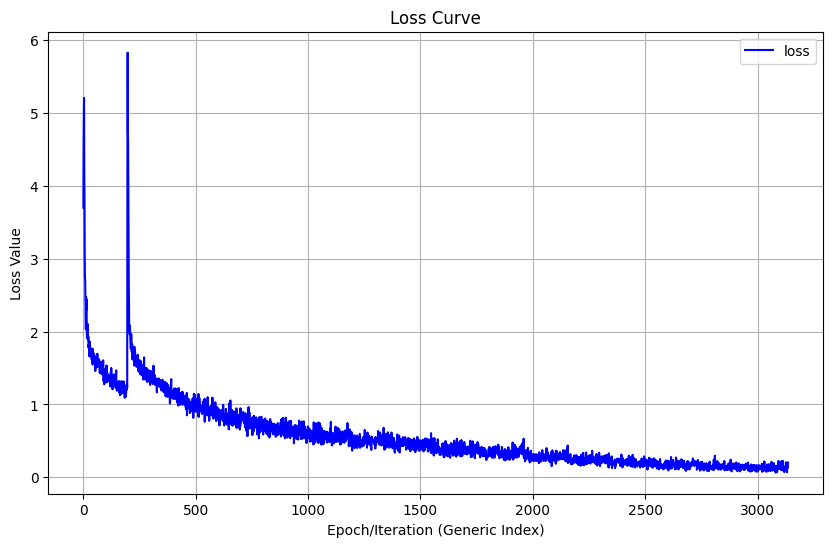

In [ ]:
train_loss.plot_losses()

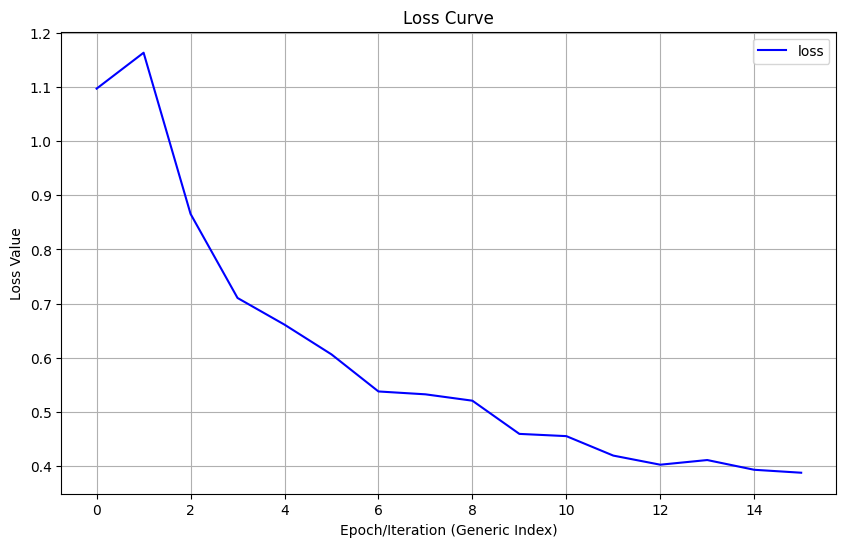

In [ ]:
test_loss.plot_losses()

In [ ]:
# # Compress the experiments folder
# !tar -czvf experiments.tar.gz experiments/

experiments/
experiments/resnet18_cifar10/
experiments/resnet18_cifar10/logs/
experiments/resnet18_cifar10/logs/resnet18_cifar10_test_log.csv
experiments/resnet18_cifar10/logs/resnet18_cifar10_train_log.csv
experiments/resnet18_cifar10/saves/
experiments/resnet18_cifar10/saves/best/
experiments/resnet18_cifar10/saves/best/model_best_epoch_15_acc_0.8818.pth
experiments/resnet18_cifar10/saves/best/model_best_epoch_12_acc_0.8737.pth
experiments/resnet18_cifar10/saves/best/model_best_epoch_14_acc_0.8797.pth
experiments/resnet18_cifar10/saves/checkpoint/


In [ ]:
# from google.colab import files
# files.download('experiments.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import os

# def get_file_sizes(directory, extensions=(".pth",)):
#     print(f"Checking file sizes in: {directory}\n")

#     total_size = 0
#     file_info = []

#     for filename in os.listdir(directory):
#         if filename.endswith(extensions):
#             path = os.path.join(directory, filename)
#             size_bytes = os.path.getsize(path)
#             size_mb = size_bytes / (1024 * 1024)
#             file_info.append((filename, size_mb))
#             total_size += size_mb

#     if not file_info:
#         print("No matching files found.")
#         return

#     for fname, size in sorted(file_info, key=lambda x: -x[1]):
#         print(f"{fname:50} : {size:.2f} MB")

#     print(f"\nTotal size: {total_size:.2f} MB")

# SAVE_PATH_MODEL = "./experiments/resnet18_cifar10/saves/best"
# get_file_sizes(SAVE_PATH_MODEL)


Checking file sizes in: ./experiments/resnet18_cifar10/saves/best

model_best_epoch_15_acc_0.8818.pth                 : 127.97 MB
model_best_epoch_14_acc_0.8797.pth                 : 127.97 MB
model_best_epoch_12_acc_0.8737.pth                 : 127.97 MB

Total size: 383.92 MB
